In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def plot_decision_boundary(dataset_name, kernel_name, alpha, train_y, train_X, b, kernel_function, sigma, ax, resolution=100, colors=('b', 'k', 'r'), levels=(-1, 0, 1)):
    """Plots the model's decision boundary on the input axes object.
    Range of decision boundary grid is determined by the training data.
    Returns decision boundary grid and axes object (`grid`, `ax`)."""

    # Generate coordinate grid of shape [resolution x resolution]
    # and evaluate the model over the entire space
    xrange = np.linspace(train_X[0, :].min(), train_X[0, :].max(), resolution)
    yrange = np.linspace(train_X[1, :].min(), train_X[1, :].max(), resolution)
    grid = [[decision_function(alpha, train_y, train_X, b, kernel_function, sigma, np.array([xr, yr])[:, np.newaxis])
                                for xr in xrange] for yr in yrange]
    grid = np.array(grid).reshape(len(xrange), len(yrange))

    signed_alpha = np.multiply(alpha, train_y)
    if kernel_function.__name__ == 'Gaussian_kernel':
        K = kernel_function(train_X, train_X, sigma)
    else:
        K = kernel_function(train_X, train_X)
    w_norm = np.sqrt(np.dot(np.dot(signed_alpha, K), signed_alpha.T))
#     print (w_norm)
    # the distance from the origin to the decision boundary is b / w_norm
    
    # Plot decision contours using grid and
    # make a scatter plot of training data
    ax.contour(xrange, yrange, grid, levels=[-1, 0, 1], linewidths=(1, 1, 1),
               linestyles=('--', '-', '--'), colors=colors)
#     print (np.squeeze(np.asarray(train_y[0, :])).shape)
    train_X = np.array(train_X)
    ax.scatter(train_X[0,:], train_X[1,:],
               c=np.squeeze(np.array(train_y[0, :])), cmap=plt.cm.viridis, lw=0, alpha=0.25)

    # Plot support vectors (non-zero alphas)
    # as circled points (linewidth > 0)
    sv = np.where(alpha != 0)
    ax.scatter(train_X[0, sv[1]], train_X[1, sv[1]],
               c=np.squeeze(np.asarray(train_y[0, sv[1]])), cmap=plt.cm.viridis, lw=1, edgecolors='k')

    title = '{}_{}'.format(dataset_name, kernel_name)
    ax.set_title(title)
    plt.savefig(title + '.png')
    
#     return grid, ax

In [13]:
from problem1 import *
from problem2 import *
from problem3 import *

import pickle

Gaussian_kernel
Gaussian_kernel
Gaussian_kernel


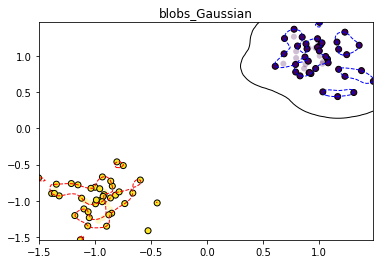

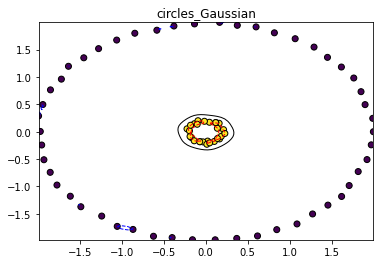

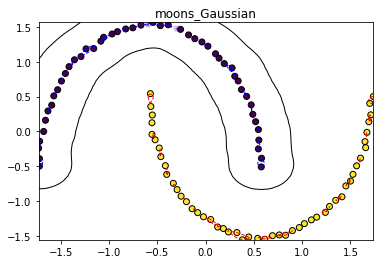

In [14]:
datasets = ['blobs', 'circles', 'moons']
# kernels = ['linear', 'Gaussian']
# kernels = ['linear']
kernels = ['Gaussian']

for d in datasets:
    for k in kernels:
        with open('../data/trained_model_{}_{}_kernel.pkl'.format(d, k), 'rb') as f:
            model = pickle.load(f)
            print (model.kernel_func.__name__)
        fig, ax = plt.subplots()
        plot_decision_boundary(d, k, model.alpha, model.train_y ,model.train_X, model.b, model.kernel_func, model.sigma, ax)